In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout

from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


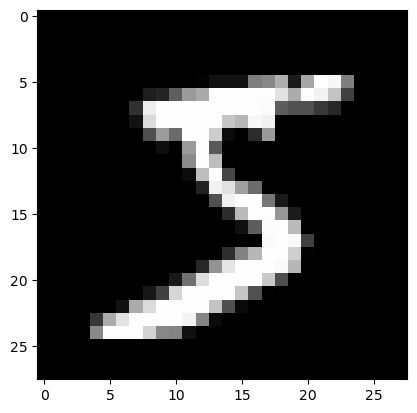

In [5]:
plt.imshow(X_train[0], cmap='gray')

In [6]:
y_train[0]

5

In [7]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [28]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10)
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8429 - loss: 0.5284 - val_accuracy: 0.9561 - val_loss: 0.1562
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9503 - loss: 0.1701 - val_accuracy: 0.9665 - val_loss: 0.1171
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.9640 - loss: 0.1176 - val_accuracy: 0.9722 - val_loss: 0.0968
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.9729 - loss: 0.0930 - val_accuracy: 0.9746 - val_loss: 0.0880
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.9772 - loss: 0.0737 - val_accuracy: 0.9753 - val_loss: 0.0853
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.9791 - loss: 0.0679 - val_accuracy: 0.9770 - val_loss: 0.0806
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 0.9815 - loss: 0.0567 - val_accuracy: 0.9757 - val_loss: 0.0820
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.9837 - los

In [12]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [13]:
loss, acc = model.evaluate(X_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.9796 - loss: 0.0785

Testing loss: 0.07, acc: 0.98%


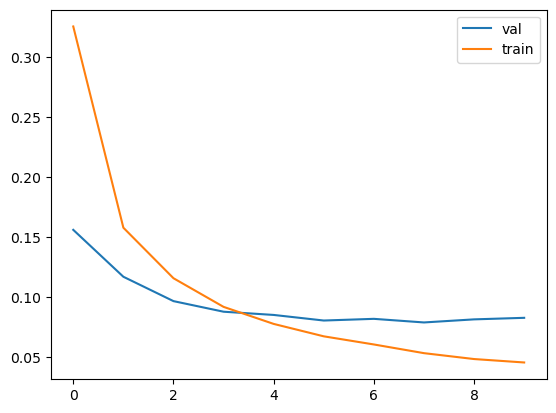

In [14]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'train'])

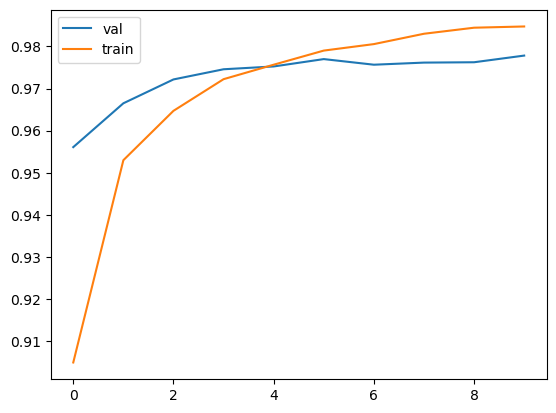

In [15]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val', 'train'])

In [16]:
probablity_model = Sequential([
    model,
    Softmax()
])

In [17]:
predicted = probablity_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step


In [20]:
predicted_classes = np.argmax(predicted, axis=1)
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test)

predicted:
[7 2 1 ... 4 5 6]
True Label:
[7 2 1 ... 4 5 6]


In [ ]:
prediction_classes == y_test

Text(0, 0.5, 'True label')

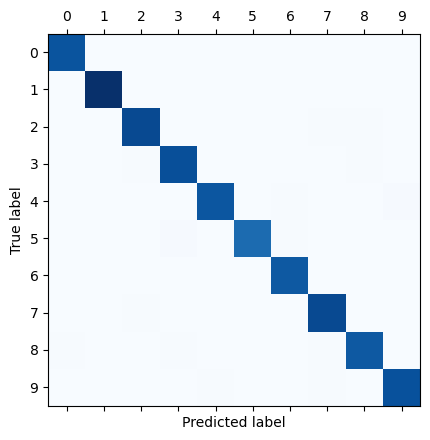

In [24]:
plt.matshow(confusion_matrix(y_test, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [25]:
confusion_matrix(y_test, predicted_classes)

array([[ 972,    1,    2,    1,    0,    0,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    0,    2,    1,    2,    0],
       [   4,    0, 1012,    1,    1,    1,    2,    5,    6,    0],
       [   0,    0,    7,  992,    0,    2,    0,    4,    5,    0],
       [   2,    0,    0,    0,  960,    0,    6,    1,    4,    9],
       [   2,    0,    0,   10,    1,  869,    6,    1,    2,    1],
       [   1,    3,    0,    1,    2,    3,  946,    0,    2,    0],
       [   2,    1,    5,    2,    1,    0,    0, 1013,    1,    3],
       [   5,    0,    1,    7,    2,    2,    2,    6,  948,    1],
       [   2,    3,    0,    4,    5,    3,    1,    6,    0,  985]])